In [1]:
import os

import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.animation as manimation

import gym_env
from LinearRL import LinearRL
from utils import render_maze, render_DR, render_V, make_plots, record_trials, get_map, record_trajectory, test_agent

In [2]:
agent = LinearRL(env_name="tolman-10x10-latent", alpha=0.01, gamma=1.0, num_steps=1000000)

In [3]:
agent.maze

array([['1', '0', '1', '1', '0', '1', '1', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '1', '0', '0', 'G'],
       ['0', '0', '0', '0', '0', '0', '1', '0', '1', '1'],
       ['1', '0', '1', '1', '0', '1', '1', '0', '1', '1'],
       ['1', '0', '1', '1', '0', '0', '0', '0', '1', '1'],
       ['1', '0', '1', '0', '0', '0', '0', '0', '1', '1'],
       ['1', '0', '1', '0', '0', '1', '1', '0', '1', '1'],
       ['S', '0', '1', '0', '0', '1', '0', '0', '1', '1'],
       ['0', '0', '1', '1', '0', '1', '0', '0', '0', '0'],
       ['1', '0', '1', '1', '0', '1', '1', '0', '0', '0']], dtype='<U21')

In [4]:
# Run learning on non-blocked detour environment
agent.learn()

/Users/abizzle/anaconda3/envs/gym/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:181: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(
/Users/abizzle/Research/LinearRL-TD/notebooks/LinearRL.py:185: RuntimeWarning: divide by zero encountered in log
  self.V = np.round(np.log(self.Z), 2)


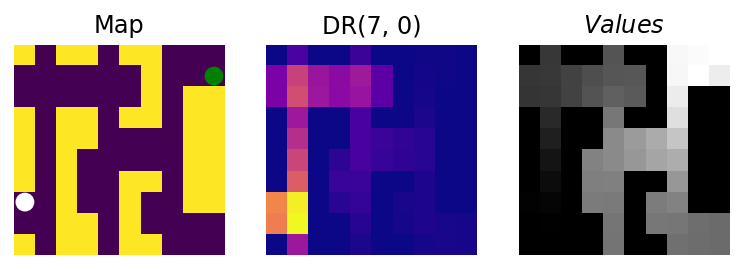

In [5]:
make_plots(agent)

In [6]:
print(f"Start location: {agent.start_loc}, Target location: {agent.target_loc}")
traj_old_goal = test_agent(agent)

Start location: [7 0], Target location: [1 9]
Starting in state: [7 0]
Took action: 1 and arrived in state: [7 1]
Took action: 2 and arrived in state: [6 1]
Took action: 2 and arrived in state: [5 1]
Took action: 2 and arrived in state: [4 1]
Took action: 2 and arrived in state: [3 1]
Took action: 2 and arrived in state: [2 1]
Took action: 1 and arrived in state: [2 2]
Took action: 1 and arrived in state: [2 3]
Took action: 1 and arrived in state: [2 4]
Took action: 0 and arrived in state: [3 4]
Took action: 0 and arrived in state: [4 4]
Took action: 1 and arrived in state: [4 5]
Took action: 1 and arrived in state: [4 6]
Took action: 1 and arrived in state: [4 7]
Took action: 2 and arrived in state: [3 7]
Took action: 2 and arrived in state: [2 7]
Took action: 2 and arrived in state: [1 7]
Took action: 1 and arrived in state: [1 8]
Took action: 1 and arrived in state: [1 9]
Took 19 steps


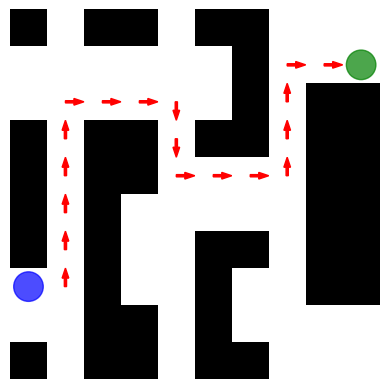

In [7]:
record_trajectory(agent, traj_old_goal)

## New Goal

In [8]:
# Get new maze and initialize a new agent
new_agent = LinearRL(env_name="tolman-10x10-latent-new-goal", alpha=0.1, gamma=0.8)

In [9]:
new_agent.target_loc

array([9, 9])

In [10]:
# New goal location
loc = new_agent.target_loc
idx = agent.mapping[(loc[0], loc[1])]

In [17]:
idx

99

In [11]:
D0 = agent.DR
L0 = np.diag(np.exp(-agent.r)) - agent.T
# D0 = np.linalg.inv(L0)
L = np.diag(np.exp(-agent.r)) - new_agent.T

In [12]:
changes = []

d = L[idx, :] - L0[idx, :]
m0 = D0[:,idx]

# Convert d to a row vector of size (1, m)
d = d.reshape(1, -1)

# Convert m0 to a column vector of size (m, 1)
m0 = m0.reshape(-1, 1)

print(f"d shape: {d.shape}, m0 shape: {m0.shape}")
print(f"numerator shape: {(np.dot(m0,d)).shape}")
print(f"denominator shape: {(np.dot(d, m0)).shape}")
alpha = (np.dot(m0,d)) / (1 + (np.dot(d,m0)))
print(f"alpha shape: {alpha.shape}")
change = np.dot(alpha,D0)
changes.append(change)

D = np.copy(D0)
for change in changes:
    D -= change

d shape: (1, 100), m0 shape: (100, 1)
numerator shape: (100, 100)
denominator shape: (1, 1)
alpha shape: (100, 100)


In [13]:
new_agent.DR = D
new_agent.update_V()

/Users/abizzle/Research/LinearRL-TD/notebooks/LinearRL.py:91: RuntimeWarning: divide by zero encountered in log
  self.V = np.round(np.log(self.Z), 2)


In [14]:
new_agent.V.reshape(10,10)

array([[ -inf, -2.23,  -inf,  -inf, -1.94,  -inf,  -inf, -2.75, -3.08,
        -3.71],
       [-2.23, -2.21, -2.11, -2.  , -1.91, -1.9 ,  -inf, -2.23, -2.74,
         -inf],
       [-2.24, -2.23, -2.11, -1.95, -1.79, -1.86,  -inf, -1.61,  -inf,
         -inf],
       [ -inf, -2.35,  -inf,  -inf, -1.49,  -inf,  -inf, -1.26,  -inf,
         -inf],
       [ -inf, -2.47,  -inf,  -inf, -1.26, -1.07, -0.95, -0.91,  -inf,
         -inf],
       [ -inf, -2.6 ,  -inf, -1.32, -1.24, -1.06, -0.86, -0.58,  -inf,
         -inf],
       [ -inf, -2.68,  -inf, -1.37, -1.35,  -inf,  -inf, -0.12,  -inf,
         -inf],
       [-2.81, -2.77,  -inf, -1.41, -1.43,  -inf,  0.25,  0.2 ,  -inf,
         -inf],
       [-2.83, -2.83,  -inf,  -inf, -1.47,  -inf,  0.3 ,  0.37,  0.51,
         0.59],
       [ -inf, -2.85,  -inf,  -inf, -1.5 ,  -inf,  -inf,  0.48,  0.57,
         0.  ]])

In [15]:
new_agent_traj = test_agent(new_agent)

Starting in state: [7 0]
Took action: 1 and arrived in state: [7 1]
Took action: 2 and arrived in state: [6 1]
Took action: 2 and arrived in state: [5 1]
Took action: 2 and arrived in state: [4 1]
Took action: 2 and arrived in state: [3 1]
Took action: 2 and arrived in state: [2 1]
Took action: 1 and arrived in state: [2 2]
Took action: 1 and arrived in state: [2 3]
Took action: 1 and arrived in state: [2 4]
Took action: 0 and arrived in state: [3 4]
Took action: 0 and arrived in state: [4 4]
Took action: 1 and arrived in state: [4 5]
Took action: 1 and arrived in state: [4 6]
Took action: 0 and arrived in state: [5 6]
Took action: 1 and arrived in state: [5 7]
Took action: 0 and arrived in state: [6 7]
Took action: 0 and arrived in state: [7 7]
Took action: 0 and arrived in state: [8 7]
Took action: 1 and arrived in state: [8 8]
Took action: 1 and arrived in state: [8 9]
Took action: 0 and arrived in state: [9 9]
Took 21 steps


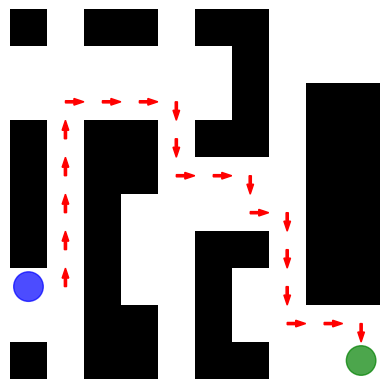

In [16]:
record_trajectory(new_agent, new_agent_traj)